# BlackRock Trust Price Prediction Using DENFIS
- A simulation of buy-and-sell trust price using DENFIS as price prediction model.
- Able to predict and generate profit with a 7.57% return ratio.


# References
- DENFIS:  N. K. Kasabov and Qun Song, "DENFIS: dynamic evolving neural-fuzzy inference system and its application for time-series prediction," in IEEE Transactions on Fuzzy Systems, vol. 10, no. 2, pp. 144-154, April 2002, doi: 10.1109/91.995117.
- Stock Trading: K. K. Ang and C. Quek, "Stock Trading Using RSPOP: A Novel Rough Set-Based Neuro-Fuzzy Approach," in IEEE Transactions on Neural Networks, vol. 17, no. 5, pp. 1301-1315, Sept. 2006, doi: 10.1109/TNN.2006.875996.

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
!pip install pandas -q
!pip install yfinance -q
!pip install yahoofinancials -q
!pip install mpld3 -q
!pip install keras -q

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# Dataset

Trust stock used for the project:
- **Trust Stock**: BlackRock Multi-Sector Income Trust (BIT)
- **Period**: Using the full dataset from 2013-02-26 until the current date.
- **Trust Stock Description**: BlackRock Multi-Sector Income Trust's (BIT) (the 'Trust') primary investment objective is to seek high current income [BlackRock Company, 2023](https://www.blackrock.com/us/individual/products/249839/blackrock-multisector-income-trust-fund).

# DENFIS
In this project, DENFIS is the model that will be used to predicted the trust stock prices. A simple definition of DENFIS is an ANFIS with automatic membership function creation. The formal definition of DENFIS is an adaptive intelligent system, capable of time series prediction that could create a fuzzy inference system that is adjusted dynamically based on data presented on the learning phase [Kasabov, 2002](https://doi.org/10.1109/91.995117). DENFIS itself stand for Dynamic Evolving Neural-Fuzzy Inference System.

The DENFIS model first introduced by [Kasabov, 2002](https://doi.org/10.1109/91.995117) in 2002. Take a look at Figure below, showing the architechuter of DENFIS.

![Figure 2](https://i.ibb.co/MNGrWrP/Screenshot-from-2023-11-20-22-13-33.png)

# DENFIS Layers
This is the explanation for each layer:

- **Layer 1:** Membership function layer. Turning the input according to the membership function formula. For DENFIS, the membership function is generated when we train the model with the training dataset. The detail will be explained in the next section.

- **Layer 2:** The output of each node of this layer is the product of all the incoming signals.
  $$
  O_{2,i} = w_i = \mu_{A_i}(x) \cdot \mu_{B_i}(y), \quad i = 1, 2
  $$

- **Layer 3:** The outputs of this layer are the normalization of the incoming signals.
  $$
  O_{3,i} = \frac{w_i}{w_1 + w_2}, \quad i = 1, 2
  $$

- **Layer 4:** This is the layer where least square is used to get the parameter for the weight.
  $$
  O_{4,1} = \tilde{w}_i f_i = \tilde{w}_i (p_x x + q_i y + r_i)
  $$

- **Layer 5:** The output of this layer is computed as the summation of all the incoming signals.
  $$
  \sum_i \tilde{w}_i f_i
  $$

# Evolving Clustering Method (ECM)

The Evolving Clustering Method (ECM) is used to subdivide the input set and determine the position of each data in the input set. This is the part when membership function is generated when the model is at the training phase.

Here are the simplified steps for generating said membership function:

1. Set a threshold for a cluster diameter threshold.
2. Iterate for all the training data that are given.
3. Put new data to a cluster, if the distance between is less or equal to the diameter threshold. Otherwise, create a new cluster.
4. For each of the clusters generated, a triangular membership function is defined by this formula:
   $$
   \mu(\hat{x}) = mf(\hat{x}, a, b, c) = \max\left(\min\left(\frac{(\hat{x}-a)}{(b-a)}, \frac{(c-\hat{x})}{(c-b)}\right), 0\right),
   $$
   where:
   - $\hat{x}$ will be the testing input
   - $a = b - (d \times \text{diameter\_threshold})$
   - $c = b + (d \times \text{diameter\_threshold})$
   - $d$ is a parameter of the width of the triangular function (1.2-2.0)

# Literature Review

## Hybrid AI Method Chosen: DENFIS

DENFIS is a type of neural-fuzzy system which integrates the principles of neural networks and fuzzy logic to create a dynamic model capable of dealing with time-series data. It was developed by Nikola Kasabov and Qun Song in the early 2000s. The system is "dynamic" and "evolving" because it can adapt and learn from new data in real-time, making it highly suitable for time-series prediction where data patterns can change over time.

## Research using DENFIS
- **DENFIS: dynamic evolving neural-fuzzy inference system and its application for time-series prediction** by Kasabov, et al - Introduced DENFIS for time-series prediction [Kasabov, 2002](https://doi.org/10.1109/91.995117)
- **AR Dynamic Evolving Neuro-Fuzzy Inference System for Mortality Data by Piscopo** - Implemented DENFIS for mortality prediction [Piscopo, 2017](https://doi.org/10.9790/9622-0703062629)
- **Dynamic Neural Fuzzy Inference System** by Hwang, et al - Introduces DyNFIS, replaces the triangular with a Gaussian membership function [Hwang, 2008](https://doi.org/10.1007/978-3-642-02490-0_151)
- **A New Method for Evaporation Modeling: Dynamic Evolving Neural-Fuzzy Inference System** by Kisi, et al - Evaporation estimation using DENFIS then compares it with basic ANFIS [Kisi, 2017](https://doi.org/10.1155/2017/5356324)

## Current Field of Applications

- Financial Forecasting: DENFIS has been widely used for stock market prediction, currency exchange rate forecasting, etc.

- Environmental Modeling: Applications in predicting environmental changes, such as air quality, water levels, and weather forecasting.

## Comparison with Other Methods

- Compared to Traditional Neural Networks: DENFIS offers the advantage of handling fuzzy data and can adapt to new data without retraining the entire model. (This online variation is not implemented in this project however)

- High Explainibility: Compares to other deep model, DENFIS provide high explainibility because of the fuzzy membership generation.

# Benchmark Method
The RMSE error will be evaluated for determining which model version of model perform the best.

For splitting the dataset, this project use a blocking time series split. Blocking time series split will seperate the dataset into five part of cross folding.

First four of those cross folding will be used to determined the parameter of the model. While the last fold will be used to be tested and to be evaluated.

After the prediction is retrieved, it will be put into a simulation to determined the portofolio returns. The best model should able to return high portofolio returns.

# Implementation
There is little to none DENFIS implementation or library that are readily available and/or easy to use for this project.

Therefore, in this project DENFIS is going to be implemented **from scratch**, only using basic library like numpy.

# Evolving Clustering Method Implementation

In [16]:
class EvolvingClusteringMethod:
    """
    This class implements an evolving clustering method.

    Attributes:
        threshold_diameter (float): A threshold value used to determine the maximum diameter for a cluster.
        threshold_radius (float): Half of the threshold diameter, representing the maximum radius for a cluster.
        clusters (list): A dynamic list of clusters, each cluster containing a set of data points.
        cluster_centers (list): A list of the current centers for each cluster.
        cluster_radius (list): A list of the current radius for each cluster.
    """

    # Constructor for the EvolvingClusteringMethod class
    def __init__(self, threshold_diameter=0.5):

        self.threshold_diameter = threshold_diameter
        self.threshold_radius = threshold_diameter/2.0

        self.clusters = []
        self.cluster_centers = []
        self.cluster_radius = []

    # Function to update the clusters with a new data point
    def update_clusters(self, data_point):
        assigned = False
        for i, center in enumerate(self.cluster_centers):
            current_cluster_radius = self.cluster_radius[i]

            if np.linalg.norm(np.subtract(data_point, center)) <= current_cluster_radius:
                self.clusters[i].append(data_point)
                self.cluster_centers[i] = np.mean(self.clusters[i])
                assigned = True
                break

        for i, center in enumerate(self.cluster_centers):
            if assigned:
                break
            if np.linalg.norm(np.subtract(data_point, center)) <= self.threshold_radius:
                self.clusters[i].append(data_point)
                self.cluster_centers[i] = np.mean(self.clusters[i])
                self.cluster_radius[i] = np.linalg.norm(np.subtract(data_point, center))
                assigned = True
                break

        if not assigned:
            self.clusters.append([data_point])
            self.cluster_centers.append(data_point)
            self.cluster_radius.append(0)

        return not assigned

# The DENFIS Model
DENFIS model is going to be used for predicting the trust stock prices. After the model is able to predict the prices, the predicted prices will be used to determined when to buy, sold or hold the portofolio.

In [17]:
class MembershipFunction:
    """
    This class turn the cluster into membership function.

    Attributes:
        threshold_diameter (float): A threshold value used to determine the maximum diameter for a cluster.
        cluster_centers (float): Current centers cluster.
        width_of_triangle (float): Width of the triangle membership function.
    """
    def __init__(self, cluster_center, threshold_diameter, width_of_triangle=1.7):
        self.cluster_center = cluster_center
        self.threshold_diameter = threshold_diameter
        self.width_of_triangle = width_of_triangle

    def evaluate(self, input_values):
        x = input_values
        d = self.width_of_triangle

        b = self.cluster_center
        a = np.subtract(b, d*self.threshold_diameter)
        c = np.add(b, d*self.threshold_diameter)

        left_side_value = np.linalg.norm(x - a)/np.linalg.norm(b - a)
        right_side_value = np.linalg.norm(c - x)/np.linalg.norm(c - b)

        result = min(left_side_value, right_side_value)
        result = max(result, 0)
        return result

In [18]:
class ProductLayer:
    """
    This class generate the product from each of adjacent membership function.
    """
    def __init__(self):
        self.membership_function_list = []

    def add_membership_function(self, membership_function):
        self.membership_function_list.append(membership_function)

    def evaluate(self, input_values):
        evaluated_membership_function = [mf.evaluate(input_values) for mf in self.membership_function_list]
        evaluated_values = []

        for i in range(len(evaluated_membership_function)-1):
            retrieved_val = evaluated_membership_function[i]*evaluated_membership_function[i+1]
            evaluated_values.append(retrieved_val)
        return evaluated_values

class NormalizationLayer:
    """
    This class normalize the list by dividing it with sum of the list.
    """
    def __init__(self):
        pass

    def evaluate(self, old_evaluated_values):
        evaluated_values = []
        for i in old_evaluated_values:
            evaluated_values.append(i / np.sum(old_evaluated_values))
        return evaluated_values

class ConsequentLayer:
    """
    This class apply LSE to generate the least differece between predicted output and target output.
    """
    def __init__(self):
        self.consequent_parameter = None

    def train(self, weights, input_values, target_values):
        # Apply the LSE to solve for the rule consequents
        # Here we're solving X * B = Y, where B is the matrix of parameters we're trying to find
        # We use the pseudoinverse to find the best solution in a least squares sense

        function_weight = []
        for input_value in input_values:
            current_function_weight = []

            for i in input_value:
                current_function_weight.append(sum(weights)*i)
            current_function_weight.append(sum(weights))
            function_weight.append(current_function_weight)

        target_values = np.array(target_values).reshape(-1, 1)
        B, residuals, rank, s = np.linalg.lstsq(function_weight, target_values, rcond=None)
        self.consequent_parameter = B

    def test(self, weights, input_values):
        function_weights = []
        for input_value in input_values:
            current_function_weight = []

            for i in input_value:
                current_function_weight.append(sum(weights)*i)
            current_function_weight.append(sum(weights))
            function_weights.append(current_function_weight)

        predictions = np.matmul(function_weights, self.consequent_parameter)
        return predictions

In [19]:
class DENFIS:
    """
    This class apply the whole DENFIS model.
    """
    def __init__(self, threshold_diameter=0.5, width_of_triangle=1.7):
        self.ecm = EvolvingClusteringMethod(threshold_diameter)
        self.threshold_diameter = threshold_diameter
        self.width_of_triangle = width_of_triangle

        self.product_layer = ProductLayer()
        self.normalization_layer = NormalizationLayer()
        self.consequent_layer = ConsequentLayer()

    # Train the model, generate the rule, get the weight of consequent layer
    def train(self, input_values, output_values):
        for input_value in zip(input_values):
            self.ecm.update_clusters(input_value)

        for cluster_center in self.ecm.cluster_centers:
            membership_function = MembershipFunction(cluster_center, self.threshold_diameter, self.width_of_triangle)
            self.product_layer.add_membership_function(membership_function)

        current_outputs = self.product_layer.evaluate(input_values)
        current_outputs = self.normalization_layer.evaluate(current_outputs)

        self.consequent_layer.train(current_outputs, input_values, output_values)

    # Predict new values after learning from training dataset
    def predict(self, new_input_values):
        predictions = self.product_layer.evaluate(new_input_values)
        predictions = self.normalization_layer.evaluate(predictions)
        predictions = self.consequent_layer.test(predictions, new_input_values)

        return predictions

# Dataset Preperation
- Use a blocking time series dataset split
- Basically split the dataset into 5 part
- For each part, separate further into training and testing
- Evaluation will be based on last part with best parameter after tuning from first 4 part


In [20]:
# Download dataset
ticker = yf.Ticker('BIT')
stock_df = ticker.history(period="max")
stock_df = stock_df["Close"].to_numpy().flatten()

In [21]:
# Generate folding from the whole data
def generate_folding(stock_df, test_size=0.3, fold_size=3, gap=2):
    total_len = len(stock_df)

    fold_len = int(total_len*(1.0/fold_size))
    fold_list = []
    for i in range(fold_size):
        start_point = i*fold_len
        end_point = (i+1)*fold_len
        current_fold = stock_df[start_point+gap:end_point]

        current_fold_test_len = int(test_size*fold_len)
        current_fold_train_len = fold_len-current_fold_test_len

        current_fold_train = current_fold[:current_fold_train_len]
        current_fold_test = current_fold[current_fold_train_len:]

        fold_list.append([current_fold_train, current_fold_test])

    return fold_list

In [22]:
# Split each folding to training and testing dataset
def split_train_sequence(train_dataset, n_steps=3):
    x, y = list(), list()

    for i in range(len(train_dataset)):
        end_point = i + n_steps
        if end_point > len(train_dataset)-1:
            break

        seq_x, seq_y = train_dataset[i:end_point], train_dataset[end_point]

        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [23]:
# Seperate the data for hyper parameter tuning and testing
fold_list = generate_folding(stock_df)
cross_folding_list = fold_list[:-1]
testing_dataset = fold_list[-1]

# Hyper Parameter Tuning for DENFIS
A function to iterate all parameter for DENFIS and find the best parameter. Recommended to not set the **is_find_DENFIS_param** to True, as this will takes a lot of time. The best parameter is already assigned to the final model later in next section.

In [24]:
# A function to iterate all parameter for DENFIS and find the best parameter.
def tune_hyperparameter_denfis(fold_list, threshold_list, width_list, n_steps=10):

    loss_dct = {}
    for threshold in threshold_list:
        loss_dct[str(threshold)] = {}
        for width in width_list:
            loss_dct[str(threshold)][str(width)] = []

    for fold in fold_list:

        train_x, train_y = split_train_sequence(fold[0], n_steps=n_steps)
        test_x, test_y = split_train_sequence(fold[1], n_steps=n_steps)

        for threshold in threshold_list:
            for width in width_list:
                denfis = DENFIS(threshold_diameter=threshold, width_of_triangle=width)
                denfis.train(train_x, train_y)

                predicted_output = denfis.predict(test_x)
                loss_dct[str(threshold)][str(width)].append(np.linalg.norm(fold[1] - predicted_output))

    min_loss = 1e+10
    hyper_param = [-1,-1]
    for threshold in threshold_list:
        for width in width_list:
            if min_loss > sum(loss_dct[str(threshold)][str(width)]):
                min_loss = sum(loss_dct[str(threshold)][str(width)])
                hyper_param = [threshold, width]

    return hyper_param

In [25]:
# Find out the best parameter for DENFIS
# Recommended not to toggle the variable, cost a lot of time
is_find_DENFIS_param = False
if is_find_DENFIS_param:
    threshold_list = np.linspace(0.05, 0.2, 5).tolist()
    width_list = np.linspace(1.5, 1.8, 5).tolist()
    hyper_param = tune_hyperparameter_denfis(cross_folding_list, threshold_list, width_list, n_steps=10)
    print(hyper_param)

# Testing Result
This part we finnaly test our model with the best parameter with the testing dataset (the last fold of the cross folding). Then we compared them with the target dataset with RSME.

In [26]:
# Split the data into training and testing
train_x, train_y = split_train_sequence(testing_dataset[0], n_steps=10)
test_x, test_y = split_train_sequence(testing_dataset[1], n_steps=10)

DENFIS RMSE: 1.1888132388758266


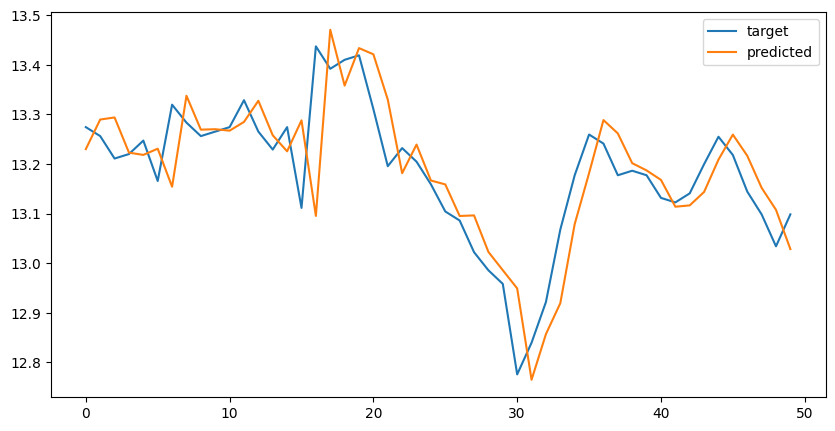

In [27]:
# Train and test a fresh DENFIS with best parameter
denfis = DENFIS(threshold_diameter=0.1, width_of_triangle=1.7)
denfis.train(train_x, train_y)
predicted_output_denfis = denfis.predict(test_x)

print("DENFIS RMSE:", np.sqrt(np.mean((test_y-predicted_output_denfis)**2)))

plt.figure(figsize = (10,5))
plt.plot((test_y[:50]))
plt.plot((predicted_output_denfis[:50]))
plt.legend(['target','predicted'])

# Testing Portofolio
- Simulating portfolio return will be roughly the same as the example in project
- The main idea is to used the simple moving average (SME) of 39 days and 100 days interval
- If SME39 is crossing higher from SME100 then it's time to buy
- If SME39 is crossing lower from SME100 then it's time to sell


In [28]:
# Create SMA for predicting when to buy and when to sold
# This part only use the predicted output to get the signal.
def create_sma(actual_output, predicted_output, fast_sma_window, slow_sma_window):
    df = pd.DataFrame(actual_output, columns=['actual'])
    df['prediction'] = predicted_output

    df['Fast_SMA'] = df['prediction'].rolling(window = fast_sma_window, min_periods = 1).mean()
    df['Slow_SMA'] = df['prediction'].rolling(window = slow_sma_window, min_periods = 1).mean()

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

    df['Position'] = df['Signal'].diff()
    df['Position'].iloc[0] = 0

    df['Trade'] = df['Position']
    prevrow = df.iloc[0]

    for index, row in df.iloc[1:].iterrows():
        if row['Trade']==0:
            if prevrow['Trade']!=0:
                df.at[index,'Trade']=prevrow['Trade']
                row['Trade']=prevrow['Trade']
        prevrow=row
    return df

In [29]:
# Plot the buy and sell signal on the graph
def plotprice(df):
    plt.figure(figsize = (10,5))
    df['prediction'].plot(color = 'k', label= 'Prediction')
    df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
    df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')

    plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
    plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')

    plt.ylabel('Price', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )

    plt.title('BIT', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()

    return df

In [31]:
# Compute the return profit, with 1 is ratio of the profit we get.
# Higher than 1 means profit, and lower than 1 means profit.
# This time, the actual price is used to determined the calculation
def compute_return(df, trate):
    df['Returns'] = 1.0
    prevrow = df.iloc[0]
    returncol = df.columns.get_loc('Returns')

    for i in range(len(df)):
        if i == 0:
            prev_i = i
            continue

        prevrow = df.iloc[prev_i]
        row = df.iloc[i]

        rt = (row['actual']/prevrow['actual'])-1
        t = prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
        df.iat[i,returncol] = t
        prev_i = i

    plt.figure(figsize = (10,5))
    df['Returns'].plot(color = 'k', label= 'Returns')

    return df

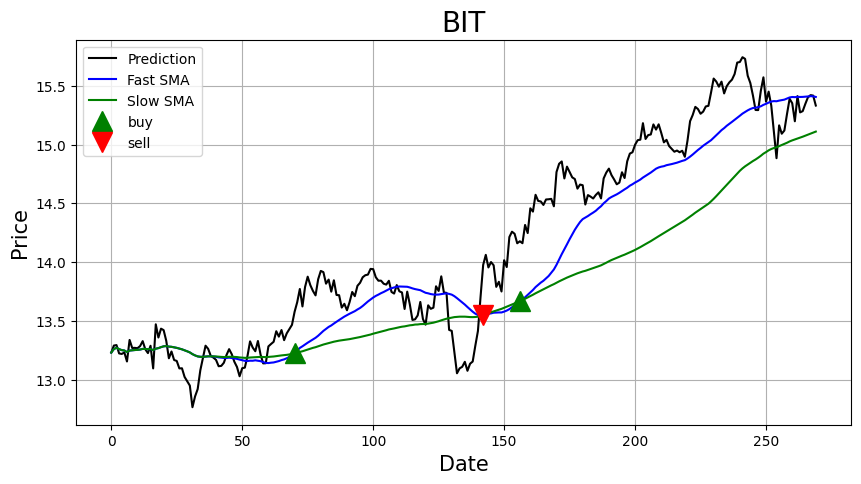

In [32]:
# Generate DENFIS buy and sell signal
fast_sma_range = 39
slow_sma_range = 100

denfis_df = create_sma(test_y, predicted_output_denfis, fast_sma_range, slow_sma_range)
denfis_df = plotprice(denfis_df)

DENFIS return ratio: 1.0757585352118344


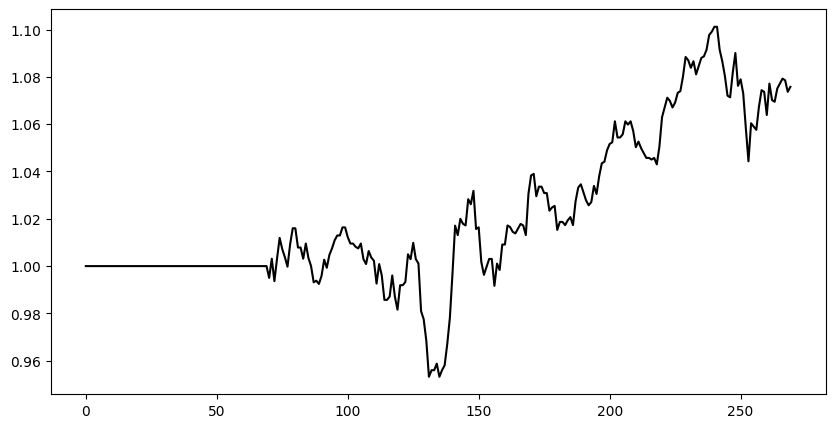

In [33]:
# Caclulate the return ratio for DENFIS
denfis_df = compute_return(denfis_df, 0.005)
print("DENFIS return ratio:", denfis_df['Returns'].iloc[-1])